<a href="https://colab.research.google.com/github/drachmacollector/Kepler-AI/blob/main/notebooks/Stellar_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint

In [ ]:
pp = pprint.PrettyPrinter(indent = 3)

In [ ]:
df = pd.read_csv("supernova_dataset.csv")
print(df.shape)
df.head()

(9564, 26)


,kepid,koi_disposition,koi_period,koi_duration,koi_depth,koi_impact,koi_model_snr,koi_num_transits,koi_ror,koi_prad,...,teff_err1,teff_err2,logg_err1,logg_err2,feh_err1,feh_err2,mass_err1,mass_err2,radius_err1,radius_err2
0,10797460,CONFIRMED,9.488036,2.95750,615.8,0.146,35.8,142.0,0.022344,2.26,...,123.0,-123.0,0.068,-0.243,0.15,-0.15,0.13150,-0.08685,0.465,-0.114
1,10797460,CONFIRMED,54.418383,4.50700,874.8,0.586,25.8,25.0,0.027954,2.83,...,123.0,-123.0,0.068,-0.243,0.15,-0.15,0.13150,-0.08685,0.465,-0.114
2,10811496,CANDIDATE,19.899140,1.78220,10829.0,0.969,76.3,56.0,0.154046,14.60,...,158.0,-171.0,0.044,-0.176,0.26,-0.26,0.10375,-0.11465,0.237,-0.078
3,10848459,FALSE POSITIVE,1.736952,2.40641,8079.2,1.276,505.6,621.0,0.387394,33.46,...,157.0,-144.0,0.053,-0.223,0.30,-0.26,0.09995,-0.07165,0.364,-0.068
4,10854555,CONFIRMED,2.525592,1.65450,603.3,0.701,40.9,515.0,0.024064,2.75,...,151.0,-207.0,0.070,-0.222,0.17,-0.29,0.19050,-0.13700,0.442,-0.133


# Looking for NaN Values

In [ ]:
nan_columns = df.isnull().sum()
nan_columns = {col:count for col, count in nan_columns.items() if count >0}

In [ ]:
pp.pprint(nan_columns)

{  'feh_err1': 109,
   'feh_err2': 109,
   'koi_depth': 363,
   'koi_impact': 363,
   'koi_model_snr': 363,
   'koi_num_transits': 1142,
   'koi_prad': 363,
   'koi_ror': 363,
   'logg_err1': 109,
   'logg_err2': 109,
   'mass_err1': 109,
   'mass_err2': 109,
   'radius_err1': 109,
   'radius_err2': 109,
   'st_dens': 109,
   'st_mass': 109,
   'teff_err1': 109,
   'teff_err2': 109}


##  Error Attributes

In [ ]:
missing_error_attribute_names = [attr for attr in df.columns if "err" in attr]
pp.pprint(missing_error_attribute_names)

[  'teff_err1',
   'teff_err2',
   'logg_err1',
   'logg_err2',
   'feh_err1',
   'feh_err2',
   'mass_err1',
   'mass_err2',
   'radius_err1',
   'radius_err2']


### Finding Distributions of Error Attributes

In [ ]:
missing_error_values_df = df[missing_error_attribute_names].copy()
print(missing_error_values_df.shape)
missing_error_values_df.head()

(9564, 10)


,teff_err1,teff_err2,logg_err1,logg_err2,feh_err1,feh_err2,mass_err1,mass_err2,radius_err1,radius_err2
0,123.0,-123.0,0.068,-0.243,0.15,-0.15,0.13150,-0.08685,0.465,-0.114
1,123.0,-123.0,0.068,-0.243,0.15,-0.15,0.13150,-0.08685,0.465,-0.114
2,158.0,-171.0,0.044,-0.176,0.26,-0.26,0.10375,-0.11465,0.237,-0.078
3,157.0,-144.0,0.053,-0.223,0.30,-0.26,0.09995,-0.07165,0.364,-0.068
4,151.0,-207.0,0.070,-0.222,0.17,-0.29,0.19050,-0.13700,0.442,-0.133


We can now find the mean and median of the remaining columns

In [ ]:
error_attribute_means = np.nanmean(missing_error_values_df.values, axis=0)
error_attribute_means

array([ 1.43579799e+02, -1.57755050e+02,  1.12667742e-01, -1.73388577e-01,
        2.16396933e-01, -2.41630777e-01,  1.35913231e-01, -1.38698080e-01,
        4.26744685e-01, -3.52531253e-01])

In [ ]:
error_attribute_medians = np.nanmedian(missing_error_values_df.values, axis=0)
error_attribute_medians

array([ 1.530e+02, -1.490e+02,  7.400e-02, -1.930e-01,  2.200e-01,
       -2.600e-01,  1.155e-01, -9.800e-02,  3.560e-01, -1.140e-01])

###  Effective Temperature

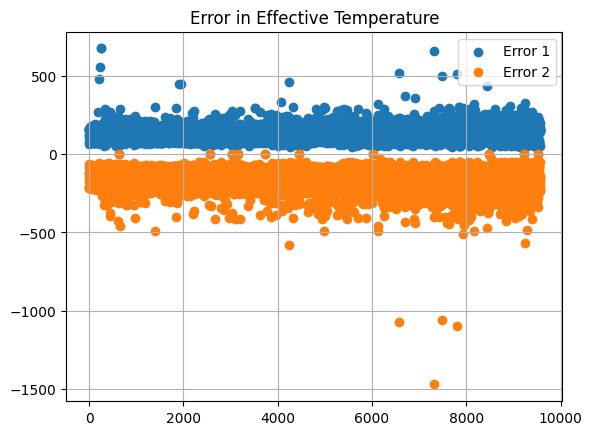

In [ ]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["teff_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["teff_err2"].values, label = "Error 2")
plt.title("Error in Effective Temperature")
plt.grid()
plt.legend()
plt.show()

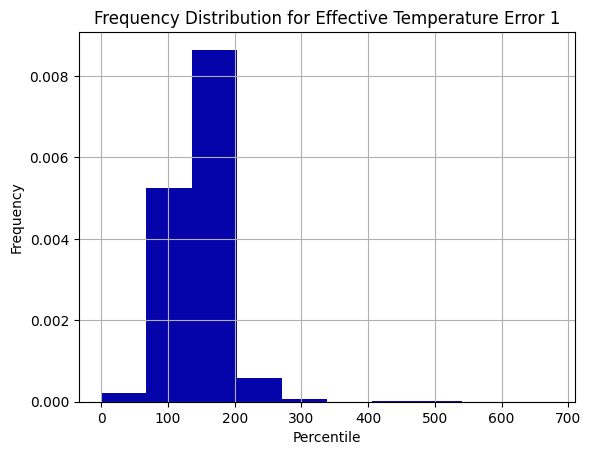

In [ ]:
plt.hist(missing_error_values_df["teff_err1"].values, color = "#0504aa", density=True)
plt.title("Frequency Distribution for Effective Temperature Error 1")
plt.xlabel("Percentile")
plt.ylabel("Frequency")
plt.grid()

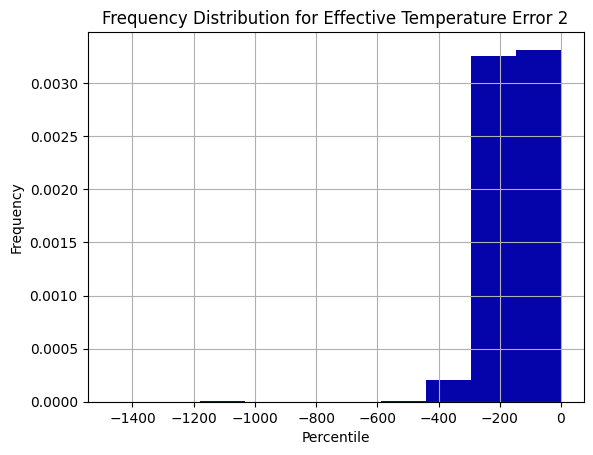

In [ ]:
plt.hist(missing_error_values_df["teff_err2"].values, color="#0504aa", density = True)
plt.title("Frequency Distribution for Effective Temperature Error 2")
plt.xlabel("Percentile")
plt.ylabel("Frequency")
plt.grid()

###  Surface Gravity

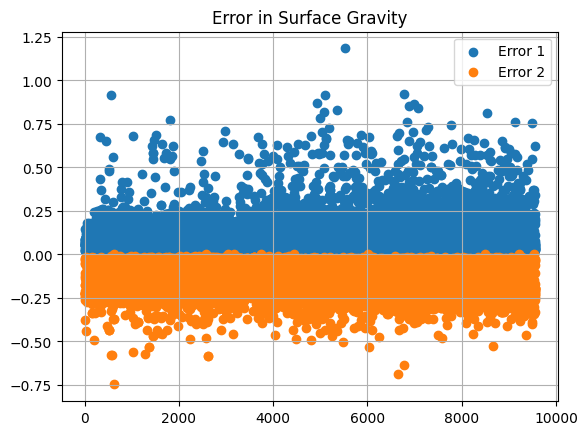

In [ ]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["logg_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["logg_err2"].values, label = "Error 2")
plt.title("Error in Surface Gravity")
plt.legend()
plt.grid()

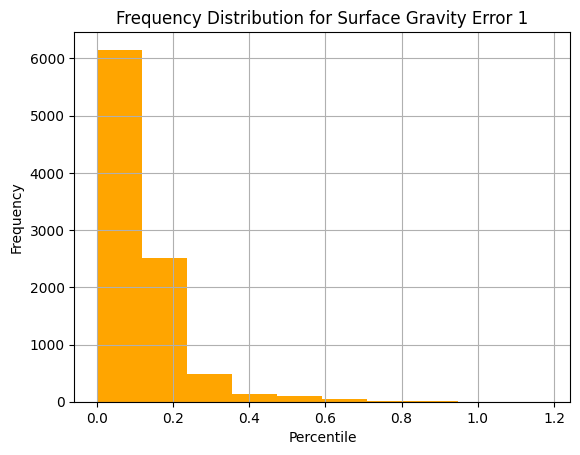

In [ ]:
plt.hist(missing_error_values_df["logg_err1"].values, color="orange")
plt.title("Frequency Distribution for Surface Gravity Error 1")
plt.xlabel("Percentile")
plt.ylabel("Frequency")
plt.grid()

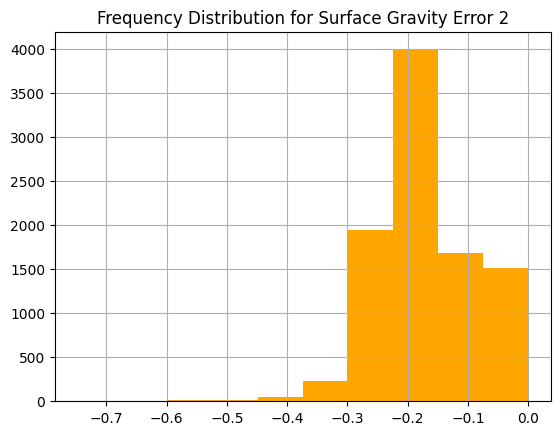

In [ ]:
plt.hist(missing_error_values_df["logg_err2"].values, color="orange")
plt.title("Frequency Distribution for Surface Gravity Error 2")
plt.grid()

###  Metallicity

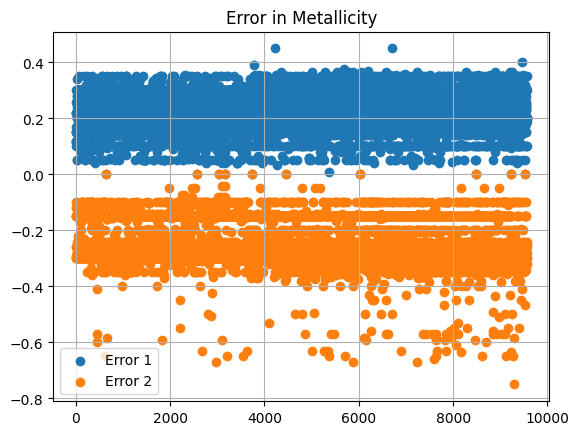

In [ ]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["feh_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["feh_err2"].values, label = "Error 2")
plt.title("Error in Metallicity")
plt.legend()
plt.grid()

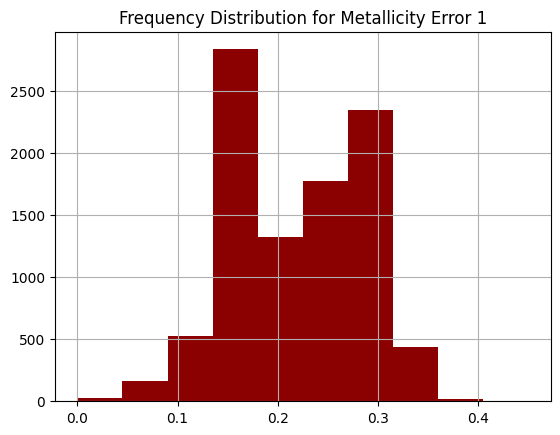

In [ ]:
plt.hist(missing_error_values_df["feh_err1"].values, color="darkred")
plt.title("Frequency Distribution for Metallicity Error 1")
plt.grid()

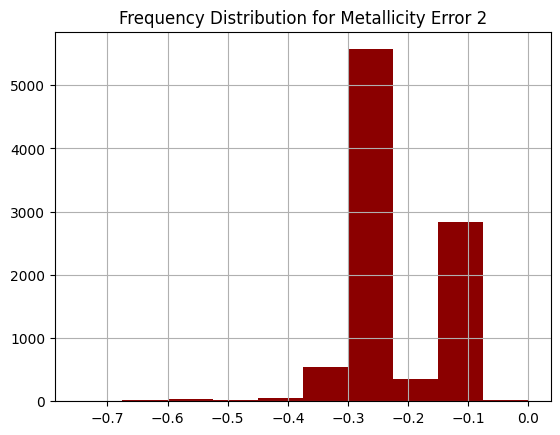

In [ ]:
plt.hist(missing_error_values_df["feh_err2"].values, color="darkred")
plt.title("Frequency Distribution for Metallicity Error 2")
plt.grid()

### Star Mass

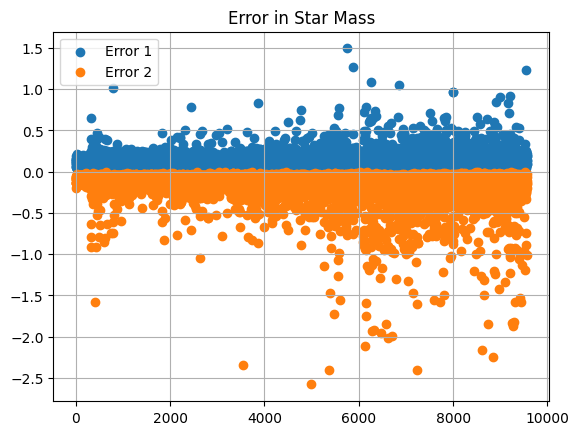

In [ ]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["mass_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["mass_err2"].values, label = "Error 2")
plt.title("Error in Star Mass")
plt.legend()
plt.grid()

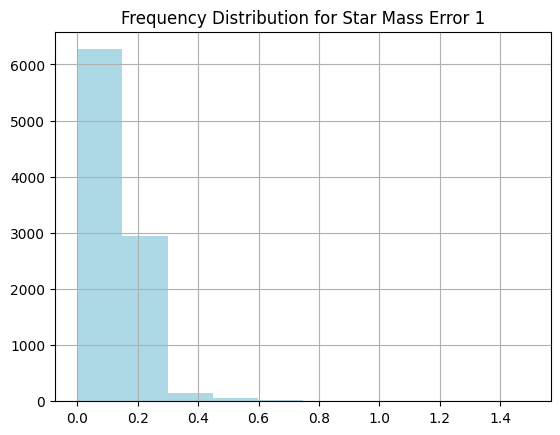

In [ ]:
plt.hist(missing_error_values_df["mass_err1"].values, color="lightblue")
plt.title("Frequency Distribution for Star Mass Error 1")
plt.grid()

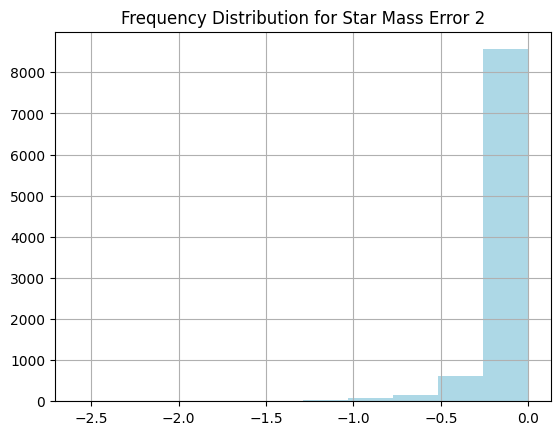

In [ ]:
plt.hist(missing_error_values_df["mass_err2"].values, color="lightblue")
plt.title("Frequency Distribution for Star Mass Error 2")
plt.grid()

### Star Radius

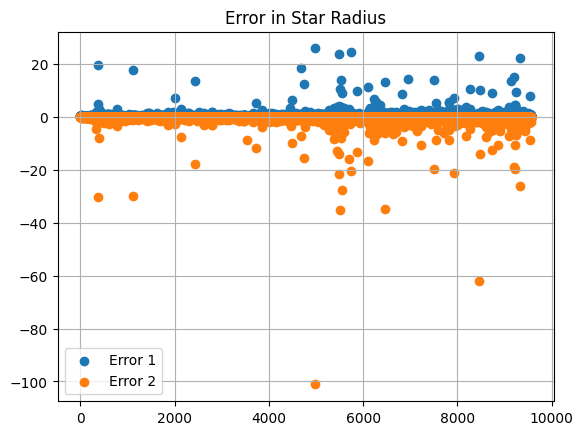

In [ ]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["radius_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["radius_err2"].values, label = "Error 2")
plt.title("Error in Star Radius")
plt.legend()
plt.grid()

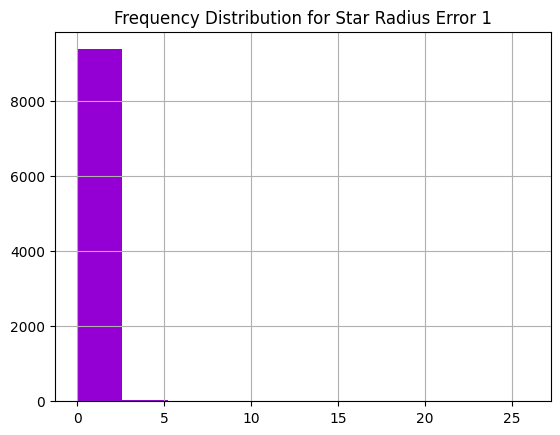

In [ ]:
plt.hist(missing_error_values_df["radius_err1"].values, color="darkviolet")
plt.title("Frequency Distribution for Star Radius Error 1")
plt.grid()

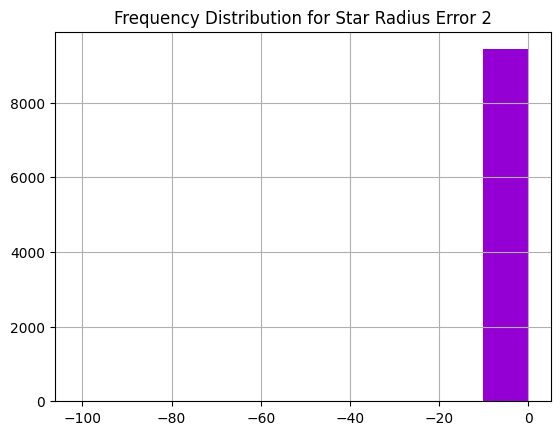

In [ ]:
plt.hist(missing_error_values_df["radius_err2"].values, color="darkviolet")
plt.title("Frequency Distribution for Star Radius Error 2")
plt.grid()

## Non-Error Attributes

In [ ]:
nan_columns = df.isnull().sum()
nan_columns = {col:count for col, count in nan_columns.items() if count >0}
pp.pprint(nan_columns)

{  'feh_err1': 109,
   'feh_err2': 109,
   'koi_depth': 363,
   'koi_impact': 363,
   'koi_model_snr': 363,
   'koi_num_transits': 1142,
   'koi_prad': 363,
   'koi_ror': 363,
   'logg_err1': 109,
   'logg_err2': 109,
   'mass_err1': 109,
   'mass_err2': 109,
   'radius_err1': 109,
   'radius_err2': 109,
   'st_dens': 109,
   'st_mass': 109,
   'teff_err1': 109,
   'teff_err2': 109}


### Transit Depth

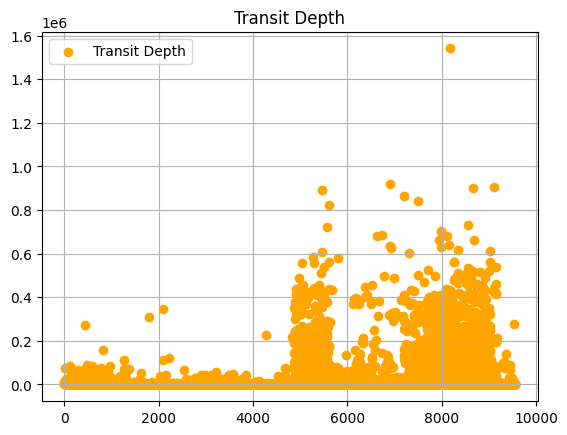

In [ ]:
plt.scatter(range(df.shape[0]), df["koi_depth"].values, label = "Transit Depth", color ="orange")
plt.title("Transit Depth")
plt.legend()
plt.grid()

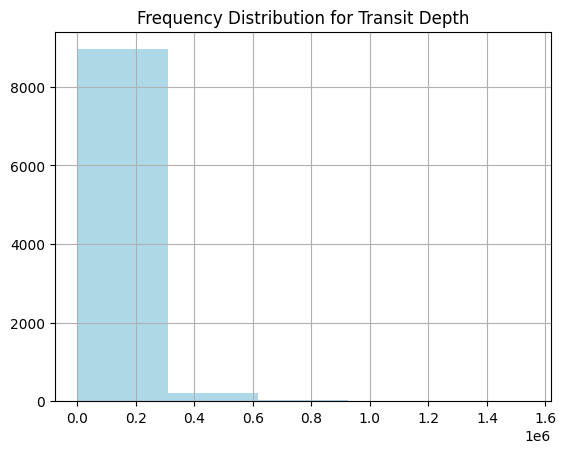

In [ ]:
plt.hist(df["koi_depth"].values, bins=5, color="lightblue")
plt.title("Frequency Distribution for Transit Depth")
plt.grid()

### Impact Parameter

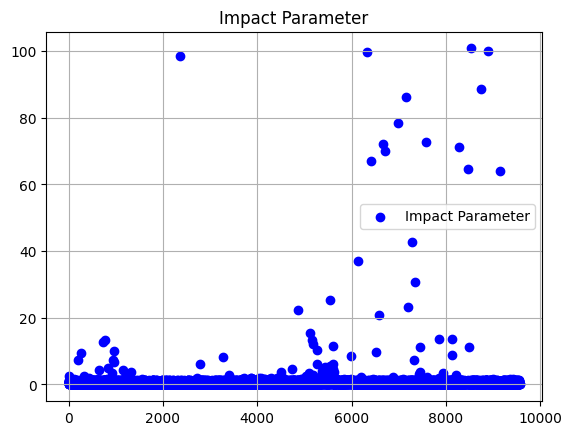

In [ ]:
plt.scatter(range(df.shape[0]), df["koi_impact"].values, label = "Impact Parameter", color="blue")
plt.title("Impact Parameter")
plt.legend()
plt.grid()

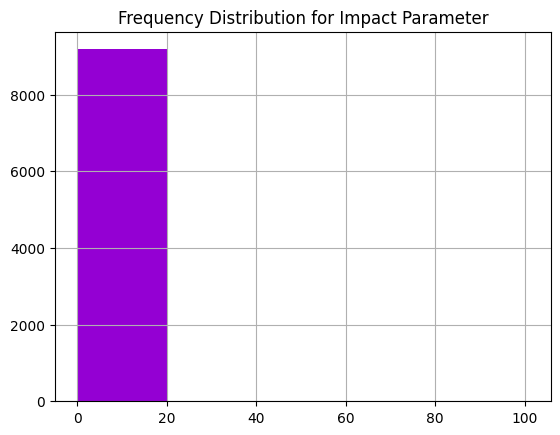

In [ ]:
plt.hist(df["koi_impact"].values, bins=5, color="darkviolet")
plt.title("Frequency Distribution for Impact Parameter")
plt.grid()

### Signal to Noise Ratio SNR

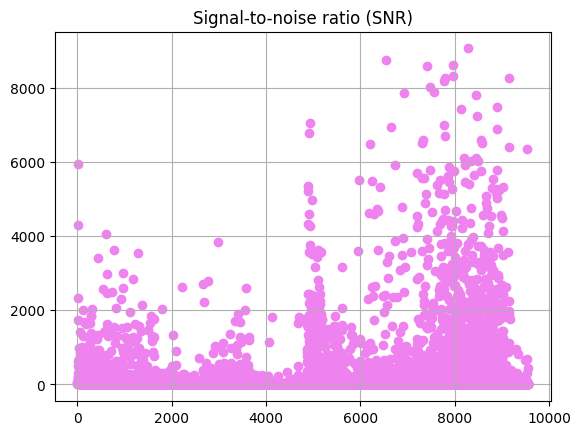

In [ ]:
plt.scatter(range(df.shape[0]), df["koi_model_snr"].values, label = "SNR", color="violet")
plt.title("Signal-to-noise ratio (SNR)")
plt.grid()

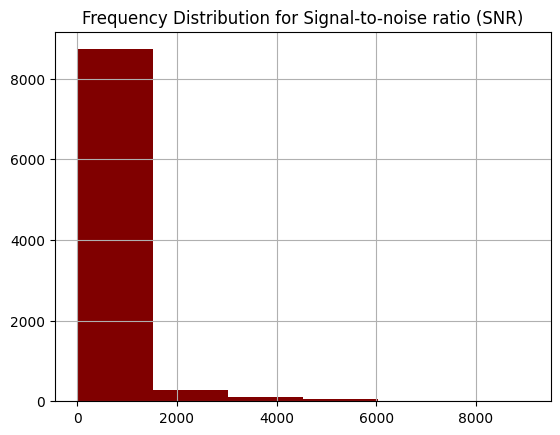

In [ ]:
plt.hist(df["koi_model_snr"].values, color="maroon", bins=6)
plt.title("Frequency Distribution for Signal-to-noise ratio (SNR)")
plt.grid()

### No. of observed transits

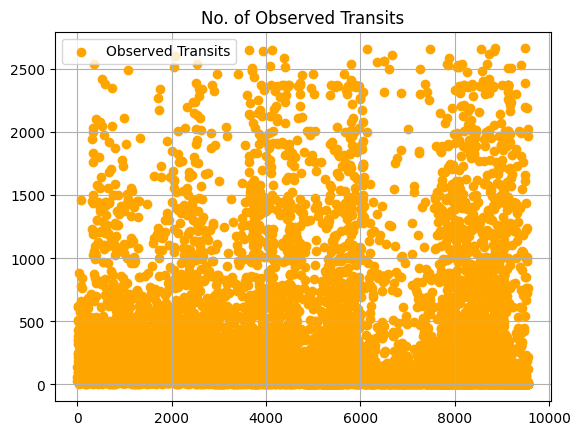

In [ ]:
plt.scatter(range(df.shape[0]), df["koi_num_transits"].values, label = "Observed Transits", color="orange")
plt.title("No. of Observed Transits")
plt.legend()
plt.grid()

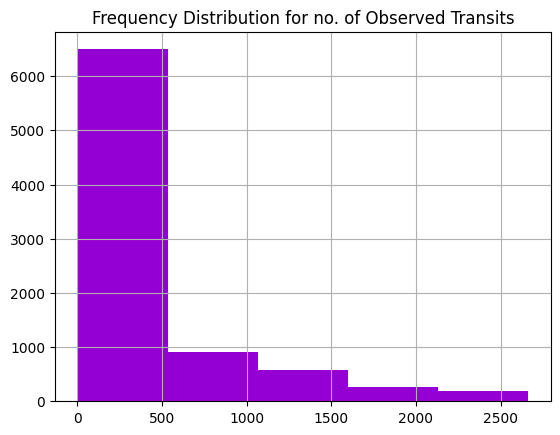

In [ ]:
plt.hist(df["koi_num_transits"].values, bins=5, color="darkviolet")
plt.title("Frequency Distribution for no. of Observed Transits")
plt.grid()

### Planet radius

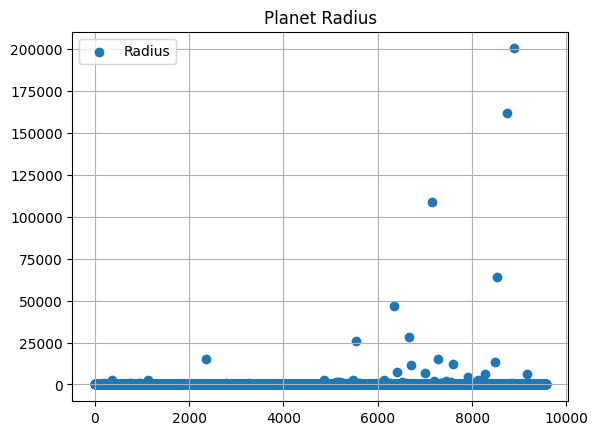

In [ ]:
plt.scatter(range(df.shape[0]), df["koi_prad"].values, label = "Radius")
plt.title("Planet Radius")
plt.legend()
plt.grid()

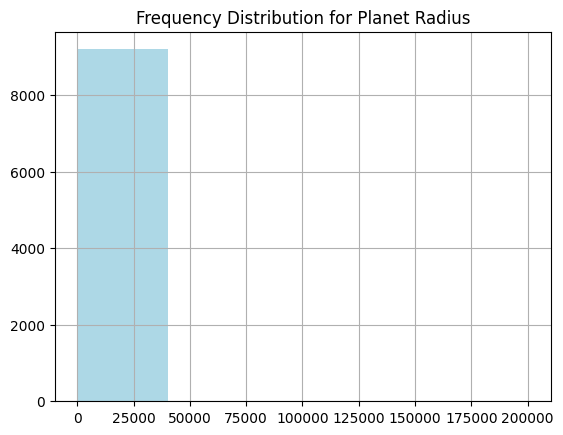

In [ ]:
plt.hist(df["koi_prad"].values, color="lightblue", bins = 5)
plt.title("Frequency Distribution for Planet Radius")
plt.grid()

### Radius Ratio

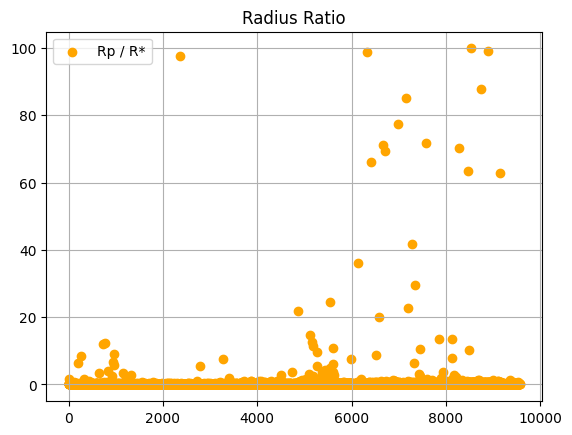

In [ ]:
plt.scatter(range(df.shape[0]), df["koi_ror"].values, label = "Rp / R*", color="orange")
plt.title("Radius Ratio")
plt.legend()
plt.grid()

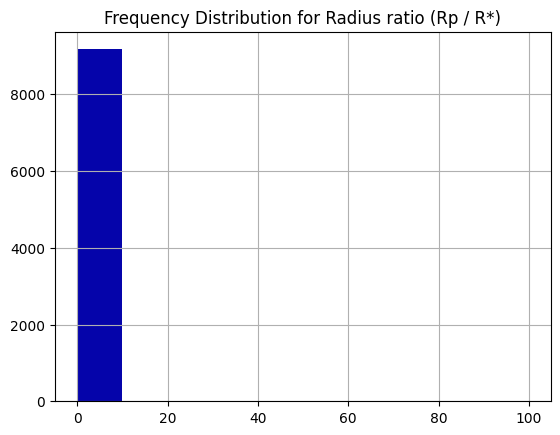

In [ ]:
plt.hist(df["koi_ror"].values, color="#0504aa")
plt.title("Frequency Distribution for Radius ratio (Rp / R*)")
plt.grid()

# Visualization

In [ ]:
import plotly.express as px
import pandas as pd
df = pd.read_csv("supernova_dataset.csv")
print(df.shape)
df.head()

(9564, 26)


,kepid,koi_disposition,koi_period,koi_duration,koi_depth,koi_impact,koi_model_snr,koi_num_transits,koi_ror,koi_prad,...,teff_err1,teff_err2,logg_err1,logg_err2,feh_err1,feh_err2,mass_err1,mass_err2,radius_err1,radius_err2
0,10797460,CONFIRMED,9.488036,2.95750,615.8,0.146,35.8,142.0,0.022344,2.26,...,123.0,-123.0,0.068,-0.243,0.15,-0.15,0.13150,-0.08685,0.465,-0.114
1,10797460,CONFIRMED,54.418383,4.50700,874.8,0.586,25.8,25.0,0.027954,2.83,...,123.0,-123.0,0.068,-0.243,0.15,-0.15,0.13150,-0.08685,0.465,-0.114
2,10811496,CANDIDATE,19.899140,1.78220,10829.0,0.969,76.3,56.0,0.154046,14.60,...,158.0,-171.0,0.044,-0.176,0.26,-0.26,0.10375,-0.11465,0.237,-0.078
3,10848459,FALSE POSITIVE,1.736952,2.40641,8079.2,1.276,505.6,621.0,0.387394,33.46,...,157.0,-144.0,0.053,-0.223,0.30,-0.26,0.09995,-0.07165,0.364,-0.068
4,10854555,CONFIRMED,2.525592,1.65450,603.3,0.701,40.9,515.0,0.024064,2.75,...,151.0,-207.0,0.070,-0.222,0.17,-0.29,0.19050,-0.13700,0.442,-0.133


### disposition

In [ ]:
px.histogram(df, x="koi_disposition")

### planet properties

In [ ]:
px.histogram(df, x="koi_prad", color="koi_disposition")

In [ ]:
px.histogram(df, x="koi_period", color="koi_disposition", log_x=True)

In [ ]:
px.scatter(df, x="koi_period", y="koi_prad", color="koi_disposition")

In [ ]:
px.scatter(df, x="koi_depth", y="koi_prad", color="koi_disposition")

In [ ]:
px.scatter(df, x="koi_model_snr", y="koi_num_transits", color="koi_disposition")

### star properties

In [ ]:
px.histogram(df, x="st_teff", color="koi_disposition")

In [ ]:
px.histogram(df, x="st_radius", color="koi_disposition")

In [ ]:
px.scatter(df, x="st_teff", y="koi_prad", color="koi_disposition")

In [ ]:
px.scatter(df, x="st_radius", y="koi_period", color="koi_disposition")

# Cluster Analysis

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.pipeline import Pipeline
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, Birch, AgglomerativeClustering, DBSCAN, SpectralClustering
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance, SilhouetteVisualizer

In [ ]:
df = pd.read_csv("supernova_dataset.csv")
print(df.shape)
df.head()

(9564, 26)


,kepid,koi_disposition,koi_period,koi_duration,koi_depth,koi_impact,koi_model_snr,koi_num_transits,koi_ror,koi_prad,...,teff_err1,teff_err2,logg_err1,logg_err2,feh_err1,feh_err2,mass_err1,mass_err2,radius_err1,radius_err2
0,10797460,CONFIRMED,9.488036,2.95750,615.8,0.146,35.8,142.0,0.022344,2.26,...,123.0,-123.0,0.068,-0.243,0.15,-0.15,0.13150,-0.08685,0.465,-0.114
1,10797460,CONFIRMED,54.418383,4.50700,874.8,0.586,25.8,25.0,0.027954,2.83,...,123.0,-123.0,0.068,-0.243,0.15,-0.15,0.13150,-0.08685,0.465,-0.114
2,10811496,CANDIDATE,19.899140,1.78220,10829.0,0.969,76.3,56.0,0.154046,14.60,...,158.0,-171.0,0.044,-0.176,0.26,-0.26,0.10375,-0.11465,0.237,-0.078
3,10848459,FALSE POSITIVE,1.736952,2.40641,8079.2,1.276,505.6,621.0,0.387394,33.46,...,157.0,-144.0,0.053,-0.223,0.30,-0.26,0.09995,-0.07165,0.364,-0.068
4,10854555,CONFIRMED,2.525592,1.65450,603.3,0.701,40.9,515.0,0.024064,2.75,...,151.0,-207.0,0.070,-0.222,0.17,-0.29,0.19050,-0.13700,0.442,-0.133


## selecting columns

We eliminate all the columns that are either of the following
*   Assigned after other values are measured from readings
*   Are error attributes
* Contain ID or name attributes

In [ ]:
ALL_COLUMNS = df.columns
ERROR_COLUMNS = [col for col in ALL_COLUMNS if "err" in col]
EXCLUDE = ["rowid", "kepid", "koi_disposition"] + ERROR_COLUMNS
TO_USE = [c for c in ALL_COLUMNS if c not in EXCLUDE]

In [ ]:
print(len(TO_USE))
df[TO_USE].head()

14


,koi_period,koi_duration,koi_depth,koi_impact,koi_model_snr,koi_num_transits,koi_ror,koi_prad,st_teff,st_logg,st_met,st_mass,st_radius,st_dens
0,9.488036,2.95750,615.8,0.146,35.8,142.0,0.022344,2.26,5762.0,4.426,0.14,0.9850,0.989,1.4690
1,54.418383,4.50700,874.8,0.586,25.8,25.0,0.027954,2.83,5762.0,4.426,0.14,0.9850,0.989,1.4690
2,19.899140,1.78220,10829.0,0.969,76.3,56.0,0.154046,14.60,5853.0,4.544,-0.18,0.9610,0.868,2.0685
3,1.736952,2.40641,8079.2,1.276,505.6,621.0,0.387394,33.46,5805.0,4.546,-0.52,0.8315,0.803,2.3120
4,2.525592,1.65450,603.3,0.701,40.9,515.0,0.024064,2.75,6031.0,4.438,0.07,1.0950,1.046,1.3470


## Extracting Dataframe Subset
We extract only those rows which are **CONFIRMED** examples i.e. the disposition value is **CONFIRMED**.

In [ ]:
new_df = df[df["koi_disposition"] == "CONFIRMED"]
print(new_df.shape)
new_df.head()

(2746, 26)


,kepid,koi_disposition,koi_period,koi_duration,koi_depth,koi_impact,koi_model_snr,koi_num_transits,koi_ror,koi_prad,...,teff_err1,teff_err2,logg_err1,logg_err2,feh_err1,feh_err2,mass_err1,mass_err2,radius_err1,radius_err2
0,10797460,CONFIRMED,9.488036,2.9575,615.8,0.146,35.8,142.0,0.022344,2.26,...,123.0,-123.0,0.068,-0.243,0.15,-0.15,0.1315,-0.08685,0.465,-0.114
1,10797460,CONFIRMED,54.418383,4.5070,874.8,0.586,25.8,25.0,0.027954,2.83,...,123.0,-123.0,0.068,-0.243,0.15,-0.15,0.1315,-0.08685,0.465,-0.114
4,10854555,CONFIRMED,2.525592,1.6545,603.3,0.701,40.9,515.0,0.024064,2.75,...,151.0,-207.0,0.070,-0.222,0.17,-0.29,0.1905,-0.13700,0.442,-0.133
5,10872983,CONFIRMED,11.094321,4.5945,1517.5,0.538,66.5,95.0,0.036779,3.90,...,163.0,-217.0,0.054,-0.229,0.22,-0.30,0.1593,-0.14265,0.414,-0.105
6,10872983,CONFIRMED,4.134435,3.1402,686.0,0.762,40.2,240.0,0.026133,2.77,...,163.0,-217.0,0.054,-0.229,0.22,-0.30,0.1593,-0.14265,0.414,-0.105


### extracting values

In [ ]:
X = new_df[TO_USE].values
y = new_df["koi_disposition"].values

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in X before scaling
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X_imputed) # Use X_imputed here

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_2d = pca.transform(X_scaled)

In [ ]:
X_2d.shape

(2745, 2)

## visualization

In [ ]:
def elbowVisualiser(model_instance, X_data, metric=None):
    if metric is None:
        visualizer = KElbowVisualizer(model_instance, k=(4,12))
    else:
        visualizer = KElbowVisualizer(model_instance, k=(4,12), metric=metric)
    visualizer.fit(X_data)
    visualizer.show(f"{model_instance}_elbow.png", dpi=600)


def interclusterDistanceVisualisation(model_instance, X_data):
    visualizer = InterclusterDistance(model_instance)
    visualizer.fit(X_data)
    visualizer.show(f"{model_instance}_inter_cluster_dist.png", dpi=600)


def silhouetteVisualisation(model_instance, X_data):
    visualizer = SilhouetteVisualizer(model_instance, colors='yellowbrick')
    visualizer.fit(X_data)
    visualizer.show(f"{model_instance}_ss.png", dpi=600)


def viewKMeansScatter(model_instance):
    clust_labels = model_instance.predict(X_scaled)
    temp_df = new_df[TO_USE].copy()
    temp_df["Class"] = clust_labels
    unique_classes = list(range(model_instance.n_clusters))
    print(temp_df.groupby("Class").median())
    plt.grid()
    for cls in unique_classes:
        sub_df = temp_df[temp_df["Class"] == cls]
        if not sub_df.empty: # Add this check for empty sub_df
            temp_X = sub_df[[col for col in temp_df.columns if col != "Class"]].values
            temp_X_2d = pca.transform(X_scaler.transform(temp_X))
            plt.grid()
            #print(X_2d.shape)
            plt.scatter(temp_X_2d[:, 0], temp_X_2d[:, 1], label=cls)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.savefig(f"kmeans_scatter.png", dpi=600)
    return temp_df.groupby("Class").median()

def viewAggScatter(model_instance):
    clust_labels = model_instance.fit_predict(X_scaled)
    temp_df = new_df[TO_USE].copy()
    temp_df["Class"] = clust_labels
    unique_classes = list(range(model_instance.n_clusters))
    print(temp_df.groupby("Class").median())
    plt.grid()
    for cls in unique_classes:
        sub_df = temp_df[temp_df["Class"] == cls]
        if not sub_df.empty: # Add this check for empty sub_df
            temp_X = sub_df[[col for col in temp_df.columns if col != "Class"]].values
            temp_X_2d = pca.transform(X_scaler.transform(temp_X))
            #print(X_2d.shape)
            plt.grid()
            plt.scatter(temp_X_2d[:, 0], temp_X_2d[:, 1], label=cls)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.savefig(f"agg_scatter_{model_instance}.png", dpi=600)
    plt.show()

def getVisualisationPCA(X):
    scaled_X = X_scaler.transform(X)
    principal_components = pca.transform(scaled_X)

    pca_df = pd.DataFrame(
        data = principal_components,
        columns = ['principal component 1', 'principal component 2']
    )

    plt.figure()
    plt.scatter(
        pca_df['principal component 1'],
        pca_df['principal component 2'],
        color = 'darkblue',
        label = 'Data Points'
    )

    plt.xlabel('principal component 1')
    plt.ylabel('principal component 2')
    plt.title('2 Component PCA (Uncolored)')
    plt.legend()
    plt.grid()
    plt.show()

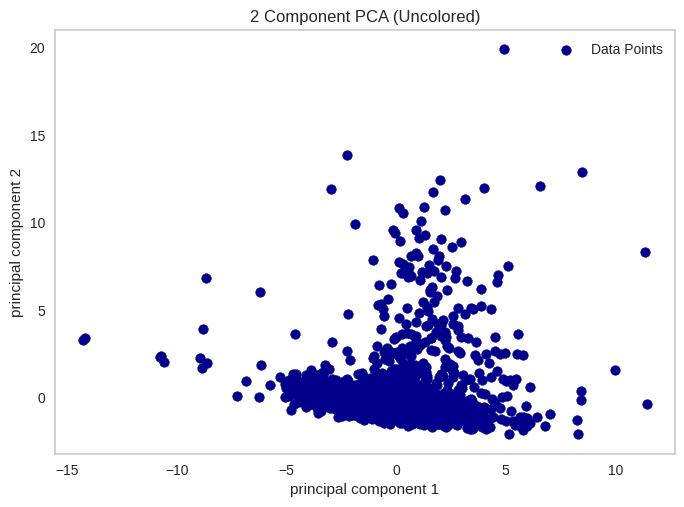

In [ ]:
getVisualisationPCA(X)

## KMeans Clustering

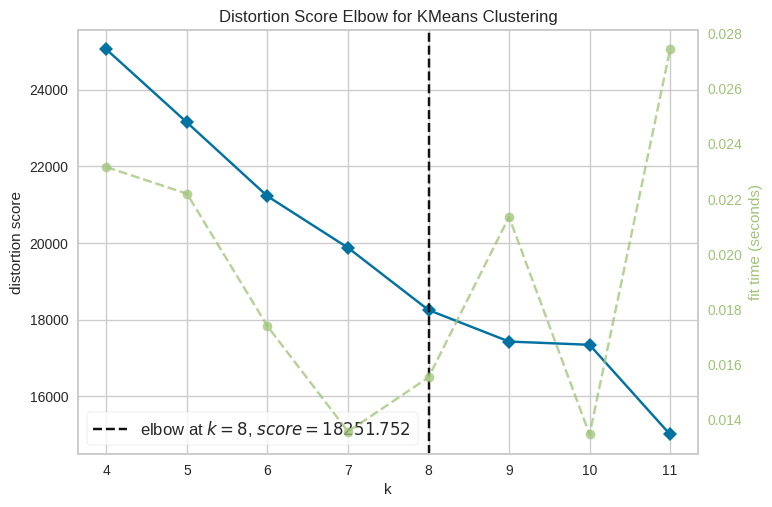

In [ ]:
kmeans_model_for_elbow = KMeans(random_state=0)
elbowVisualiser(kmeans_model_for_elbow, X_scaled)

In [ ]:
K=7
kmeans_final_model = KMeans(K, max_iter=500, random_state=0)
kmeans_final_model.fit(X_scaled)

KMeans(max_iter=500, n_clusters=7, random_state=0)

       koi_period  koi_duration  koi_depth  koi_impact  koi_model_snr  \
Class                                                                   
0       19.593964      4.629000     507.45      0.6610          27.40   
1        4.446079      3.224025   10564.40      0.3010        1015.75   
2        5.091928      2.513150     330.45      0.2260          25.60   
3      182.592235     10.821950    1050.95      0.2580          47.15   
4       16.486867      4.382300     758.90      1.2280          22.60   
5        9.427614      2.357050     815.25      0.3885          30.30   
6       12.651506      4.895700     210.05      0.4685          29.95   

       koi_num_transits   koi_ror  koi_prad  st_teff  st_logg  st_met  \
Class                                                                   
0                  64.0  0.022650      2.50   5839.0   4.4615 -0.1355   
1                 281.0  0.098905     11.67   5771.0   4.4425  0.0200   
2                 244.5  0.017133      1.68   5440

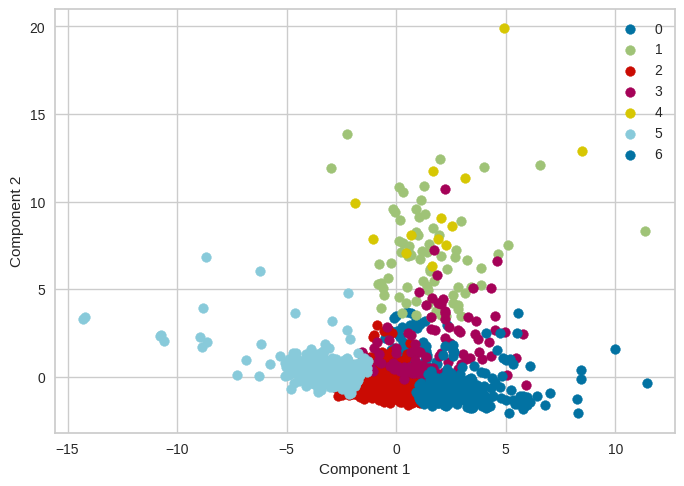

In [ ]:
t=viewKMeansScatter(kmeans_final_model)

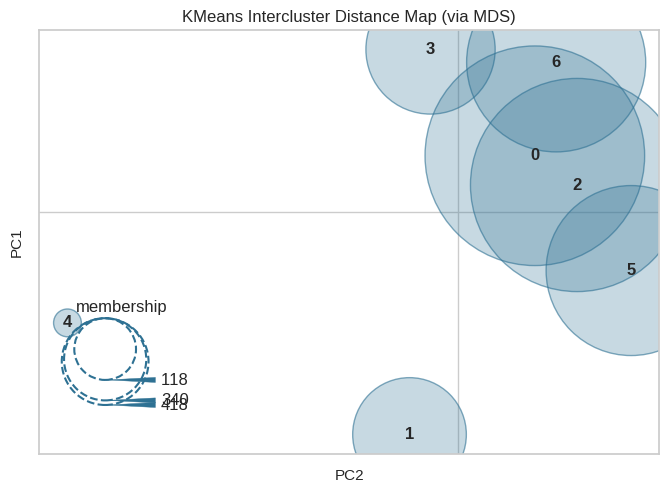

In [ ]:
interclusterDistanceVisualisation(kmeans_final_model, X_scaled)

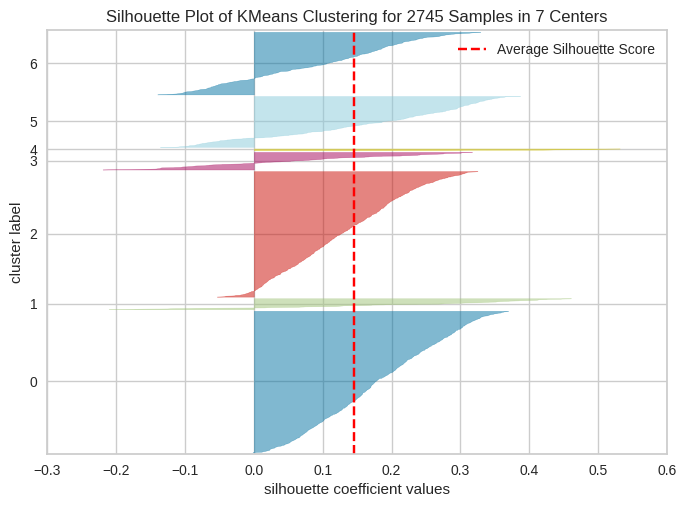

In [ ]:
silhouetteVisualisation(kmeans_final_model, X_scaled)

## Agglomerative Clustering

In [ ]:
def plot_dendrogram(X):
    de = dendrogram(linkage(X, method='ward'))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.grid()
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.savefig("dendogram.png", dpi=600)

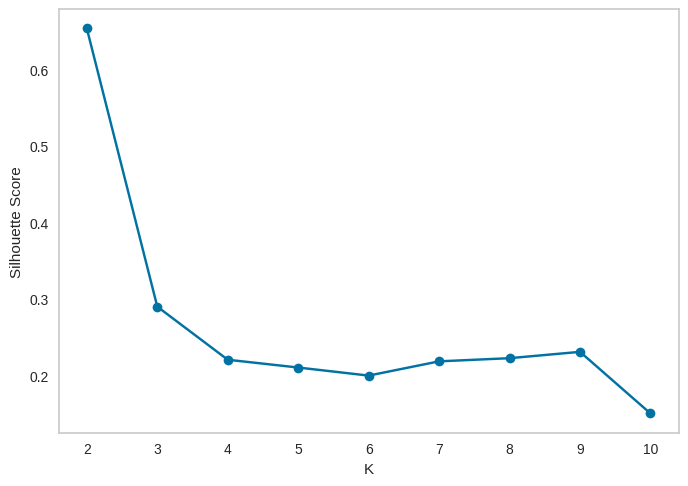

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []
K_range = range(2, 11)

for k in K_range:
    labels = AgglomerativeClustering(n_clusters=k).fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.grid()

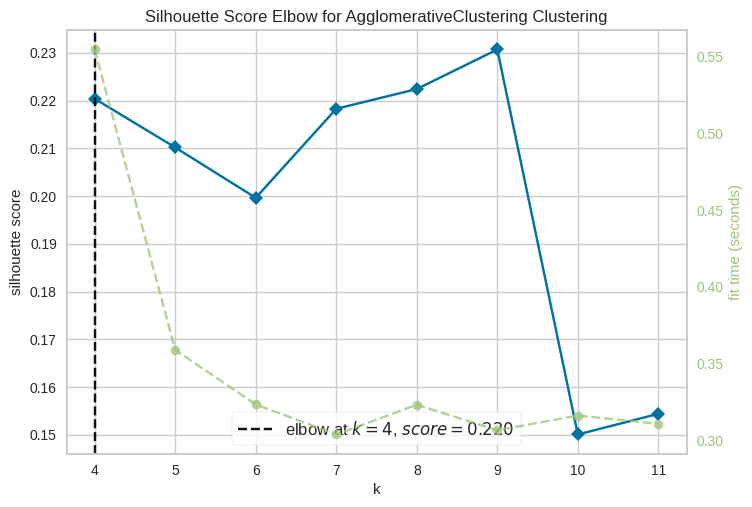

In [ ]:
agg_model_for_elbow = AgglomerativeClustering()
elbowVisualiser(agg_model_for_elbow, X_scaled, metric='silhouette')

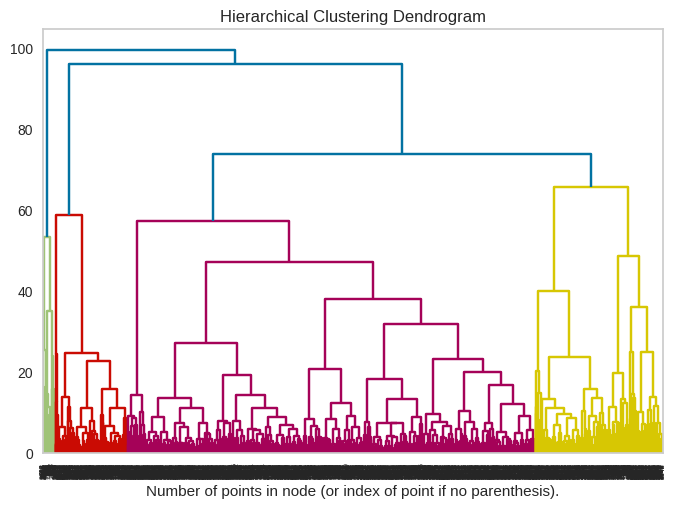

In [ ]:
plot_dendrogram(X_scaled)

       koi_period  koi_duration  koi_depth  koi_impact  koi_model_snr  \
Class                                                                   
0        3.880343      3.208165   14255.75      0.3690        1150.05   
1       11.388402      3.466000     426.70      0.3920          26.20   
2       92.101934      8.518500    2100.25      0.2670          84.45   
3        8.799970      2.339500     764.25      0.3305          30.35   
4       11.650588      4.806950     184.85      0.6490          28.50   
5        4.485592      1.096000    1821.00      0.4610          24.30   
6        0.916142      1.339400     215.10      0.3180          25.30   

       koi_num_transits   koi_ror  koi_prad  st_teff  st_logg  st_met  \
Class                                                                   
0                 338.0  0.120103    13.185   5699.5   4.4585   -0.02   
1                 109.0  0.019868     2.140   5727.0   4.4870   -0.08   
2                  12.0  0.042489     4.885   5756

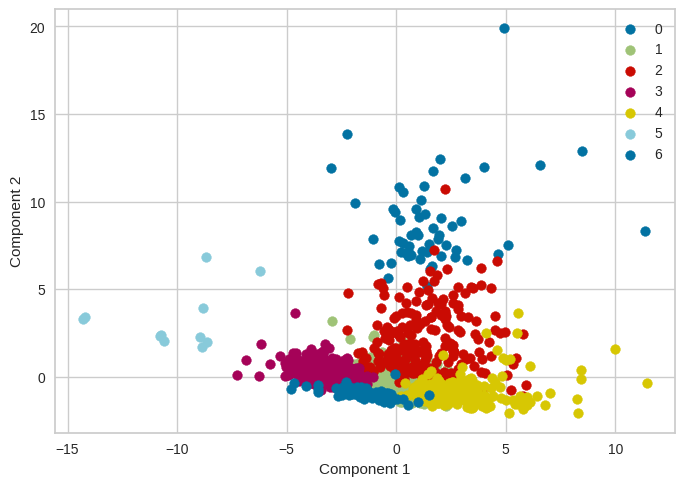

In [ ]:
K=7
agg_final_model = AgglomerativeClustering(n_clusters=K)
viewAggScatter(agg_final_model)

## Obtaining Trends

In [ ]:
t.head()

,koi_period,koi_duration,koi_depth,koi_impact,koi_model_snr,koi_num_transits,koi_ror,koi_prad,st_teff,st_logg,st_met,st_mass,st_radius,st_dens
Class,,,,,,,,,,,,,,
0,19.593964,4.629000,507.45,0.661,27.40,64.0,0.022650,2.50,5839.0,4.4615,-0.1355,0.964250,0.972,1.43525
1,4.446079,3.224025,10564.40,0.301,1015.75,281.0,0.098905,11.67,5771.0,4.4425,0.0200,0.997700,0.995,1.40975
2,5.091928,2.513150,330.45,0.226,25.60,244.5,0.017133,1.68,5440.0,4.5280,-0.0200,0.885950,0.853,1.93550
3,182.592235,10.821950,1050.95,0.258,47.15,7.0,0.031909,3.43,5756.0,4.4310,-0.0500,0.970975,1.012,1.18500
4,16.486867,4.382300,758.90,1.228,22.60,74.0,0.274887,28.47,5896.0,4.4580,-0.1400,1.020000,0.972,1.56600


In [ ]:
t.std()

,0
koi_period,64.988446
koi_duration,2.888827
koi_depth,3772.810051
koi_impact,0.351765
koi_model_snr,372.473091
koi_num_transits,99.622801
koi_ror,0.095139
koi_prad,9.945019
st_teff,653.441585
st_logg,0.156243


# Classification

In [ ]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, classification_report, cohen_kappa_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from yellowbrick.target import FeatureCorrelation
from yellowbrick.features import rank2d, RadViz, Rank2D
from yellowbrick.classifier import DiscriminationThreshold, PrecisionRecallCurve, ROCAUC
from yellowbrick.model_selection import feature_importances, CVScores, RFECV, FeatureImportances
from yellowbrick.model_selection import LearningCurve, ValidationCurve
from yellowbrick.classifier import ClassificationReport, ClassPredictionError, ConfusionMatrix

In [ ]:
df = pd.read_csv("[CLEANED]supernova-dataset.csv")
df.drop(columns = ["Unnamed: 0"], inplace=True)
print(df.shape)
df.head()

(9202, 26)


,kepid,koi_disposition,koi_period,koi_duration,koi_depth,koi_impact,koi_model_snr,koi_num_transits,koi_ror,koi_prad,...,teff_err1,teff_err2,logg_err1,logg_err2,feh_err1,feh_err2,mass_err1,mass_err2,radius_err1,radius_err2
0,10797460,CONFIRMED,9.488036,2.95750,615.8,0.146,35.8,142.0,0.022344,2.26,...,123.0,-123.0,0.068,-0.243,0.15,-0.15,0.13150,-0.08685,0.465,-0.114
1,10797460,CONFIRMED,54.418383,4.50700,874.8,0.586,25.8,25.0,0.027954,2.83,...,123.0,-123.0,0.068,-0.243,0.15,-0.15,0.13150,-0.08685,0.465,-0.114
2,10811496,CANDIDATE,19.899140,1.78220,10829.0,0.969,76.3,56.0,0.154046,14.60,...,158.0,-171.0,0.044,-0.176,0.26,-0.26,0.10375,-0.11465,0.237,-0.078
3,10848459,FALSE POSITIVE,1.736952,2.40641,8079.2,1.276,505.6,621.0,0.387394,33.46,...,157.0,-144.0,0.053,-0.223,0.30,-0.26,0.09995,-0.07165,0.364,-0.068
4,10854555,CONFIRMED,2.525592,1.65450,603.3,0.701,40.9,515.0,0.024064,2.75,...,151.0,-207.0,0.070,-0.222,0.17,-0.29,0.19050,-0.13700,0.442,-0.133


### selecting columns


In [ ]:
ALL_COLUMNS = df.columns
ERROR_COLUMNS = [col for col in ALL_COLUMNS if "err" in col]
EXCLUDE = ["kepid", "koi_disposition"] + ERROR_COLUMNS
TO_USE = list(set(ALL_COLUMNS) - set(EXCLUDE))


print(f"Columns being analysed: {len(TO_USE)}")
df[TO_USE].head()

Columns being analysed: 14


,st_teff,koi_duration,koi_prad,koi_period,st_dens,koi_model_snr,st_met,koi_num_transits,koi_impact,koi_depth,koi_ror,st_mass,st_radius,st_logg
0,5762.0,2.95750,2.26,9.488036,1.4690,35.8,0.14,142.0,0.146,615.8,0.022344,0.9850,0.989,4.426
1,5762.0,4.50700,2.83,54.418383,1.4690,25.8,0.14,25.0,0.586,874.8,0.027954,0.9850,0.989,4.426
2,5853.0,1.78220,14.60,19.899140,2.0685,76.3,-0.18,56.0,0.969,10829.0,0.154046,0.9610,0.868,4.544
3,5805.0,2.40641,33.46,1.736952,2.3120,505.6,-0.52,621.0,1.276,8079.2,0.387394,0.8315,0.803,4.546
4,6031.0,1.65450,2.75,2.525592,1.3470,40.9,0.07,515.0,0.701,603.3,0.024064,1.0950,1.046,4.438


**Extracting Dataframe Subset**

In [ ]:
np.unique(df["koi_disposition"].values)

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [ ]:
subset_df = df[df["koi_disposition"] != "CANDIDATE"]
print(subset_df.shape)
subset_df.head()

(7308, 26)


,kepid,koi_disposition,koi_period,koi_duration,koi_depth,koi_impact,koi_model_snr,koi_num_transits,koi_ror,koi_prad,...,teff_err1,teff_err2,logg_err1,logg_err2,feh_err1,feh_err2,mass_err1,mass_err2,radius_err1,radius_err2
0,10797460,CONFIRMED,9.488036,2.95750,615.8,0.146,35.8,142.0,0.022344,2.26,...,123.0,-123.0,0.068,-0.243,0.15,-0.15,0.13150,-0.08685,0.465,-0.114
1,10797460,CONFIRMED,54.418383,4.50700,874.8,0.586,25.8,25.0,0.027954,2.83,...,123.0,-123.0,0.068,-0.243,0.15,-0.15,0.13150,-0.08685,0.465,-0.114
3,10848459,FALSE POSITIVE,1.736952,2.40641,8079.2,1.276,505.6,621.0,0.387394,33.46,...,157.0,-144.0,0.053,-0.223,0.30,-0.26,0.09995,-0.07165,0.364,-0.068
4,10854555,CONFIRMED,2.525592,1.65450,603.3,0.701,40.9,515.0,0.024064,2.75,...,151.0,-207.0,0.070,-0.222,0.17,-0.29,0.19050,-0.13700,0.442,-0.133
5,10872983,CONFIRMED,11.094321,4.59450,1517.5,0.538,66.5,95.0,0.036779,3.90,...,163.0,-217.0,0.054,-0.229,0.22,-0.30,0.15930,-0.14265,0.414,-0.105


### obtaining X and y

confirmed = 1, False positive = 0

In [ ]:
X = subset_df[TO_USE].values
y = subset_df["koi_disposition"].apply(lambda x: x=='CONFIRMED').astype(int).values

In [ ]:
subset_df["koi_disposition"].value_counts()

,count
koi_disposition,
FALSE POSITIVE,4563
CONFIRMED,2745


### visualization

In [ ]:
def getVisualisationPCA(X, y):
    # EDA ONLY – scaling is allowed here
    X_scaled = StandardScaler().fit_transform(X)

    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X_scaled)

    pca_df = pd.DataFrame(
        principal_components,
        columns=['principal component 1', 'principal component 2']
    )

    pca_df["TARGET"] = pd.Series(y).map({1: "CONFIRMED", 0: "FALSE POSITIVE"})

    plt.figure(figsize=(8, 6))
    for label, color in zip(
        ["CONFIRMED", "FALSE POSITIVE"],
        cm.rainbow(np.linspace(0, 1, 2))
    ):
        mask = pca_df["TARGET"] == label
        plt.scatter(
            pca_df.loc[mask, 'principal component 1'],
            pca_df.loc[mask, 'principal component 2'],
            label=label,
            color=color,
            s=15
        )

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Projection (EDA only)")
    plt.legend()
    plt.grid()
    plt.savefig("pca.png", dpi=600)
    plt.show()

def getVarianceContribution(X):
    X_scaled = StandardScaler().fit_transform(X)
    pca = PCA().fit(X_scaled)

    variance = pca.explained_variance_ratio_

    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(variance) + 1), variance)
    plt.xlabel("Principal Component Index")
    plt.ylabel("Explained Variance Ratio")
    plt.title("PCA Explained Variance (EDA only)")
    plt.grid()
    plt.savefig("variance.png", dpi=600)
    plt.show()

def getFeatureCorrelation(X, y):
    visualizer = FeatureCorrelation(labels=TO_USE)
    visualizer.fit(X, y)
    #visualizer.show("correlation.png", dpi=600)


def getPearsonRanking(X):
    #visualizer = rank2d(X, features=TO_USE)
    visualizer = Rank2D(algorithm='pearson', features=TO_USE)
    visualizer.fit(X, y)
    visualizer.transform(X)
    #visualizer.show(outpath="pearson_ranking.png", dpi=600)


def getRadialViz(X, y):
    visualizer = RadViz(classes=[0, 1], features = TO_USE)
    visualizer.fit(X, y)
    visualizer.transform(X)
    #visualizer.show("radial.png", dpi=600)

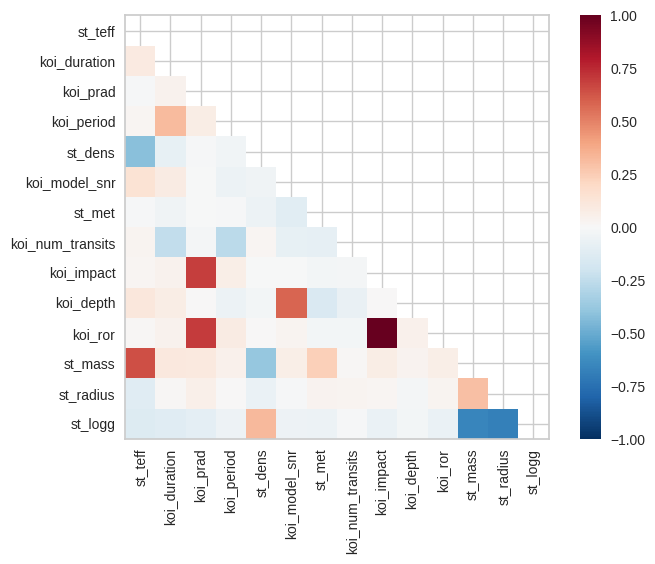

In [ ]:
getPearsonRanking(X)

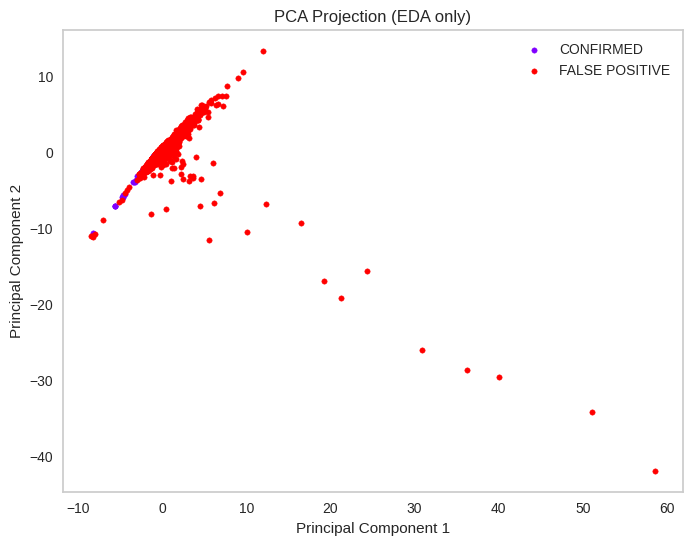

In [ ]:
getVisualisationPCA(X, y)

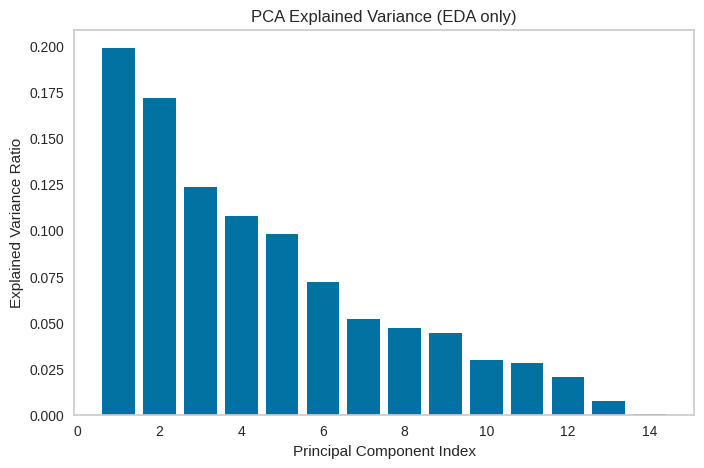

In [ ]:
getVarianceContribution(X)

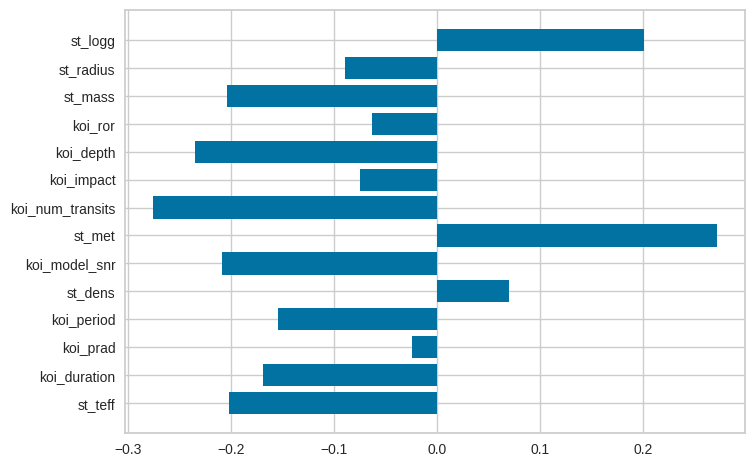

In [ ]:
getFeatureCorrelation(X, y)

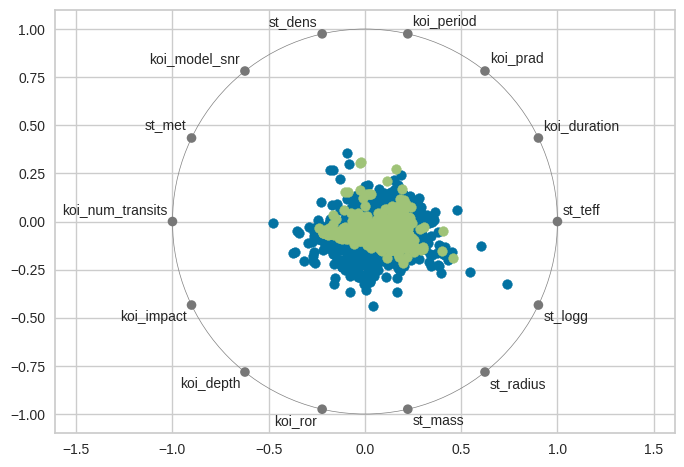

In [ ]:
getRadialViz(X, y)